<h1>UK ROAD ACCIDENT DATA ANALYSIS</h1>
<h2>INCLUSIVE YEAR 2019 - 2022</h2>
<h3>Analyst: Meloujean Ligon</h3>

<h2>DATA PREPARATION</h2>
<h3>Transfer Data set to folder</h3>

<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

<h1>DATA FRAME</h1>

In [2]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [3]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [4]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1>Converting Date Field into DATE TIME type</h1>

In [5]:
accident['Accident Date']

0           5/6/2019
1           2/7/2019
2         26-08-2019
3         16-08-2019
4           3/9/2019
             ...    
660674    18-02-2022
660675    21-02-2022
660676    23-02-2022
660677    23-02-2022
660678    28-02-2022
Name: Accident Date, Length: 660679, dtype: object

In [6]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown road condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [8]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [9]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [10]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [11]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [12]:
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')

In [13]:
accident['District Area'] = accident['District Area'].astype('category')

In [14]:
accident['Number_of_Casualties'] = accident['Number_of_Casualties'].astype('category')

In [15]:
accident['Number_of_Vehicles'] = accident['Number_of_Vehicles'].astype('category')

In [16]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')

In [17]:
accident['Road_Type'] = accident['Road_Type'].astype('category')

In [18]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')

In [19]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')

In [20]:
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [21]:
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')

In [22]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                   category
Light_Conditions           category
District Area              category
Longitude                  category
Number_of_Casualties       category
Number_of_Vehicles         category
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

In [23]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident.dtypes
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [24]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [25]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [26]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties             category
Number_of_Vehicles               category
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [27]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [28]:
latitude_longitude_cor = accident['Latitude'].corr(accident['Longitude'])

In [29]:
latitude_longitude_cor

np.float64(-0.3981137948101014)

In [30]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h4 style="color: blue;">No. 1</h4>

In [31]:
yearly_accidents = accident['Year'].value_counts().sort_index()

In [32]:
yearly_accidents

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<H2 style="color: blue;">INSIGHT 1</H2>
<H3>The number of accidents has been decreasing over the years. In 2019, there were 182,115 reported accidents, which dropped to 170,591 in 2020. The decline continued in 2021, with 163,554 accidents, and further decreased to 144,419 in 2022. </H3>

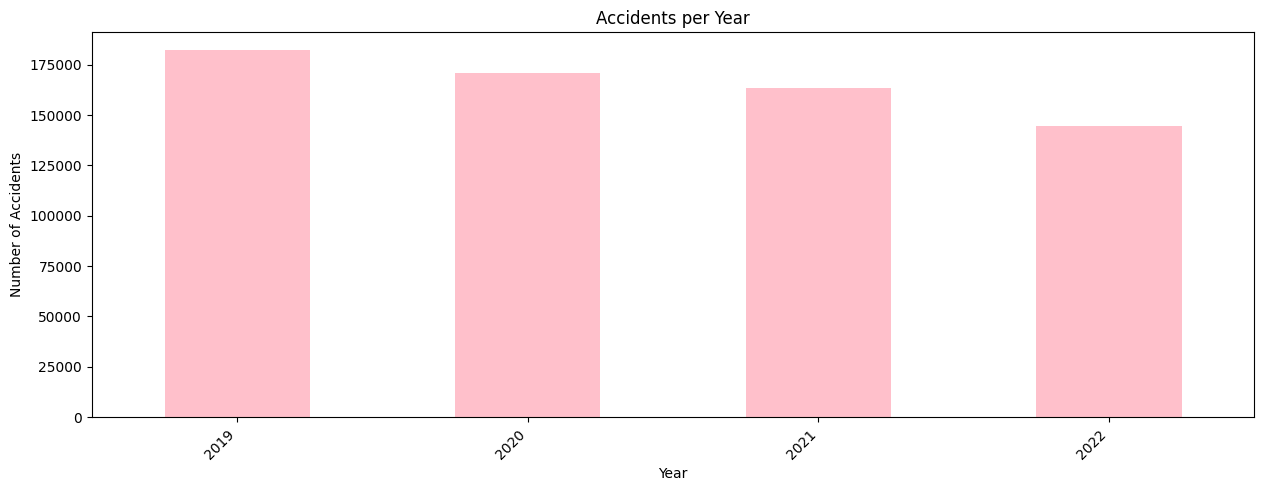

In [33]:
yearly_accidents = accident['Year'].value_counts().sort_index()
yearly_accidents.plot(kind='bar', color='pink')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.show()


<h4 style="color: blue;">No. 2</h>

In [34]:
road_type_counts = accident['Road_Type'].value_counts()

In [35]:
road_type_counts

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<h2 style="color: blue;">INSIGHT 2</h2>
<H3>The most accident-prone road type is "Single carriageway" with 74.4% or 492,143 cases.</H3>

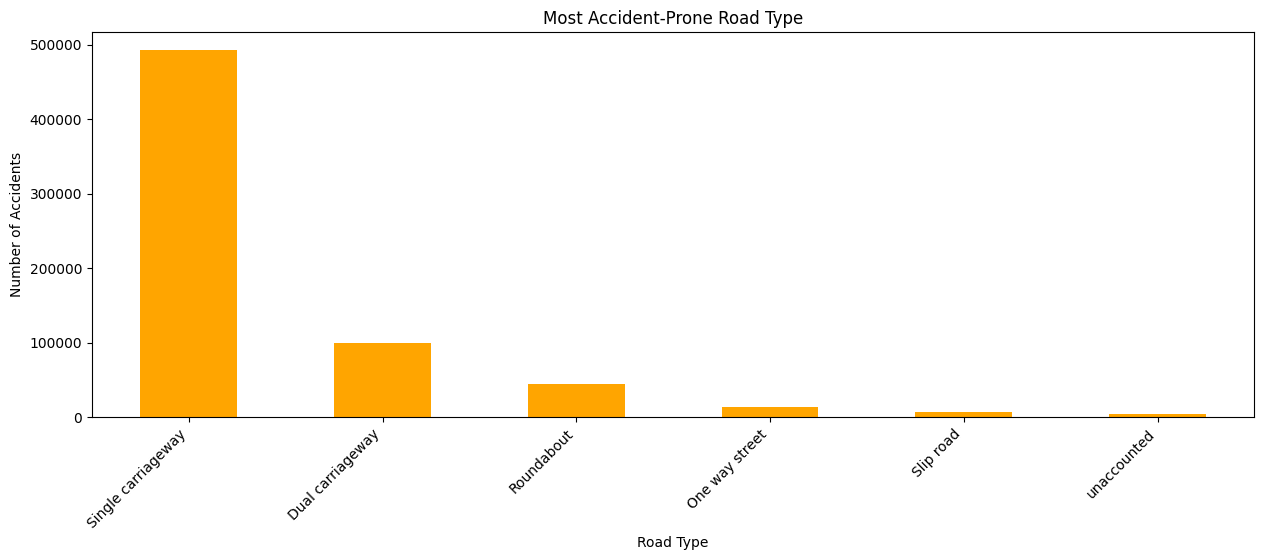

In [36]:
road_type_counts = accident['Road_Type'].value_counts()
road_type_counts.plot(kind='bar', color='orange')
plt.title('Most Accident-Prone Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.show()

<h4 style="color: blue;">No.3</h4>

In [37]:
month_counts = accident['Month'].value_counts()
month_counts

Month
11    60424
10    59580
7     57445
6     56481
9     56455
5     56352
3     54086
8     53913
1     52872
12    51836
4     51744
2     49491
Name: count, dtype: int64

<h2 style="color: blue;">INSIGHT 3</h2>
<H3>The month with the highest number of accidents is November with 8.88% or 58,687 cases, while the month with the lowest number of accidents is February with 7.42% or 49,042 cases.</H3>

C:\Users\Meloujean\AppData\Local\Temp\ipykernel_57252\3818395530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_sev = accident.groupby(['Month', 'Accident_Severity']).size().unstack()


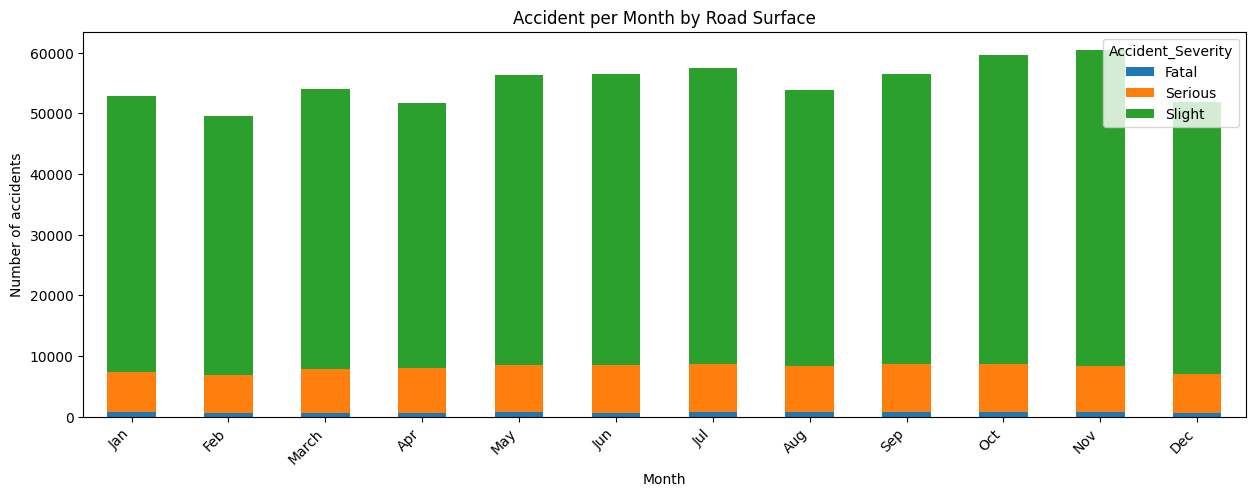

In [38]:
month_sev = accident.groupby(['Month', 'Accident_Severity']).size().unstack()

day_names = {
    1: 'Jan', 2: 'Feb', 3: 'March', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

month_sev.index = month_sev.index.map(day_names)
 
month_sev.plot(kind='bar', stacked = True)
plt.title('Accident per Month by Road Surface')
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.show()

<h4 style="color: blue;">No. 4</h1>

In [39]:
november_accidents = accident[accident['Month'] == 11]
most_common_severity_nov = november_accidents['Accident_Severity'].value_counts()
most_common_severity_nov

Accident_Severity
Slight     52109
Serious     7568
Fatal        747
Name: count, dtype: int64

In [40]:
february_accidents = accident[accident['Month'] == 2]
most_common_severity_feb = february_accidents['Accident_Severity'].value_counts()
most_common_severity_feb

Accident_Severity
Slight     42628
Serious     6246
Fatal        617
Name: count, dtype: int64

<h2 style="color: blue;">INSIGHT 4</h1>
<H3>The majority of accidents in both November and February are categorized as slight</H2>

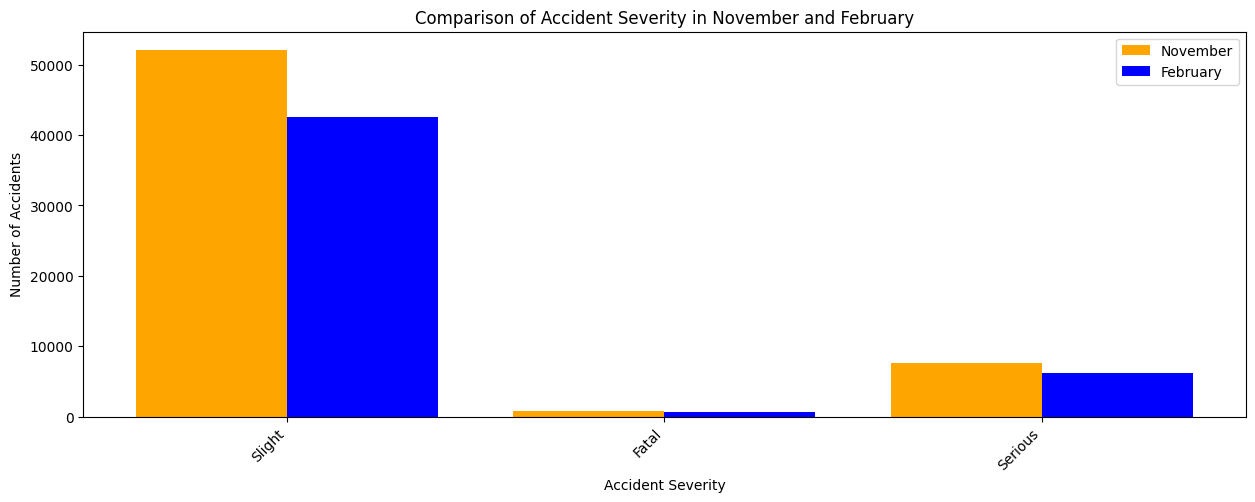

In [41]:
categories = list(set(most_common_severity_nov.index).union(set(most_common_severity_feb.index)))
nov_counts = [most_common_severity_nov.get(cat, 0) for cat in categories]
feb_counts = [most_common_severity_feb.get(cat, 0) for cat in categories]

x = np.arange(len(categories)) 

plt.bar(x - 0.2, nov_counts, width=0.4, label='November', color='orange')
plt.bar(x + 0.2, feb_counts, width=0.4, label='February', color='blue')

plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Comparison of Accident Severity in November and February')
plt.xticks(ticks=x, labels=categories)
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.legend()
plt.show()


<h4 style="color: blue;">No. 5</h1>

In [42]:
most_common_road_nov = november_accidents['Road_Surface_Conditions'].value_counts()
most_common_road_nov

Road_Surface_Conditions
Wet or damp               29474
Dry                       28736
Frost or ice               1480
Snow                        504
Flood over 3cm. deep        152
unknown road condition       78
Name: count, dtype: int64

In [43]:
most_common_road_feb = february_accidents['Road_Surface_Conditions'].value_counts()
most_common_road_feb

Road_Surface_Conditions
Dry                       28284
Wet or damp               16207
Frost or ice               3363
Snow                       1533
unknown road condition       56
Flood over 3cm. deep         48
Name: count, dtype: int64

<h2 style="color: blue;">INSIGHT 5</h1>
<H3>In November, most accidents occurred on wet or damp surfaces, while in February, most accidents occurred on dry surfaces.</H2>

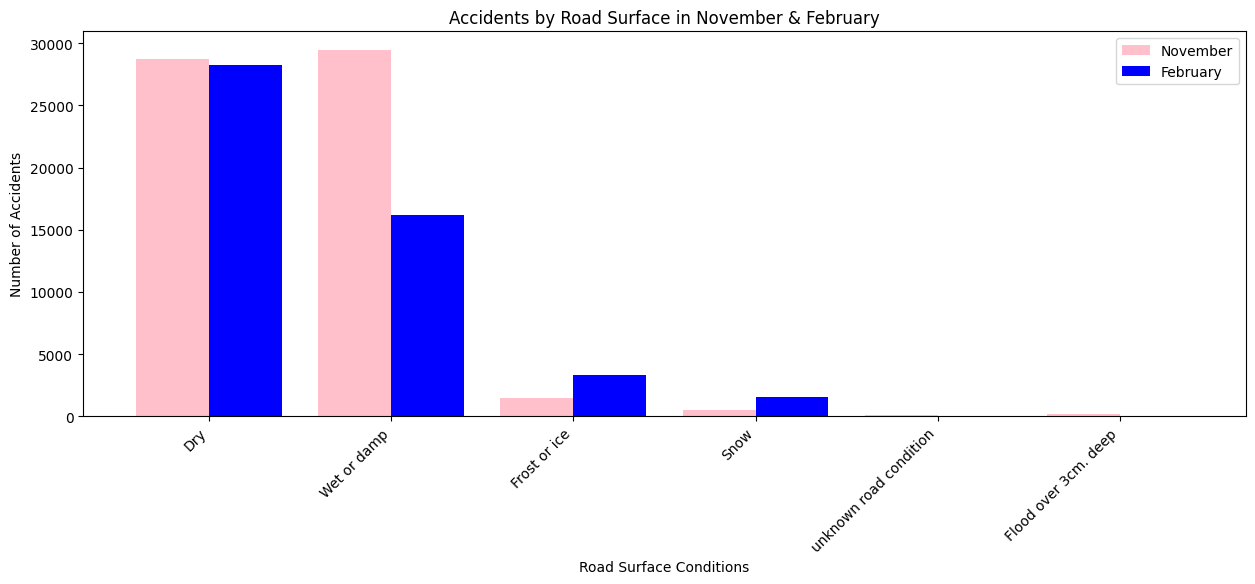

In [44]:
road_conditions = ['Dry', 'Wet or damp', 'Frost or ice', 'Snow','unknown road condition','Flood over 3cm. deep'] 

nov_counts = [most_common_road_nov.get(cond, 0) for cond in road_conditions]
feb_counts = [most_common_road_feb.get(cond, 0) for cond in road_conditions]
x = np.arange(len(road_conditions)) 
plt.bar(x - 0.2, nov_counts, width=0.4, label='November', color='pink')
plt.bar(x + 0.2, feb_counts, width=0.4, label='February', color='blue')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Road Surface in November & February')
plt.xticks(ticks=x, labels=road_conditions)
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.legend()
plt.show()


<h4 style="color: blue;">No. 6</h1>

In [45]:
most_common_weather_feb = february_accidents['Weather_Conditions'].value_counts()
most_common_weather_feb

Weather_Conditions
Fine no high winds       37671
Raining no high winds     4964
Other                     1996
Snowing no high winds     1746
unaccounted               1088
Fine + high winds          694
Fog or mist                615
Raining + high winds       501
Snowing + high winds       216
Name: count, dtype: int64

In [46]:
most_common_weather_nov = november_accidents['Weather_Conditions'].value_counts()
most_common_weather_nov

Weather_Conditions
Fine no high winds       40793
Raining no high winds    11197
Raining + high winds      2217
Other                     2173
unaccounted               1451
Fine + high winds         1388
Fog or mist                577
Snowing no high winds      563
Snowing + high winds        65
Name: count, dtype: int64

<h2 style="color: blue;">INSIGHT 6</h1>
<H3>The most common weather condition during accidents in both November and February was "Fine, no high winds"</H2>

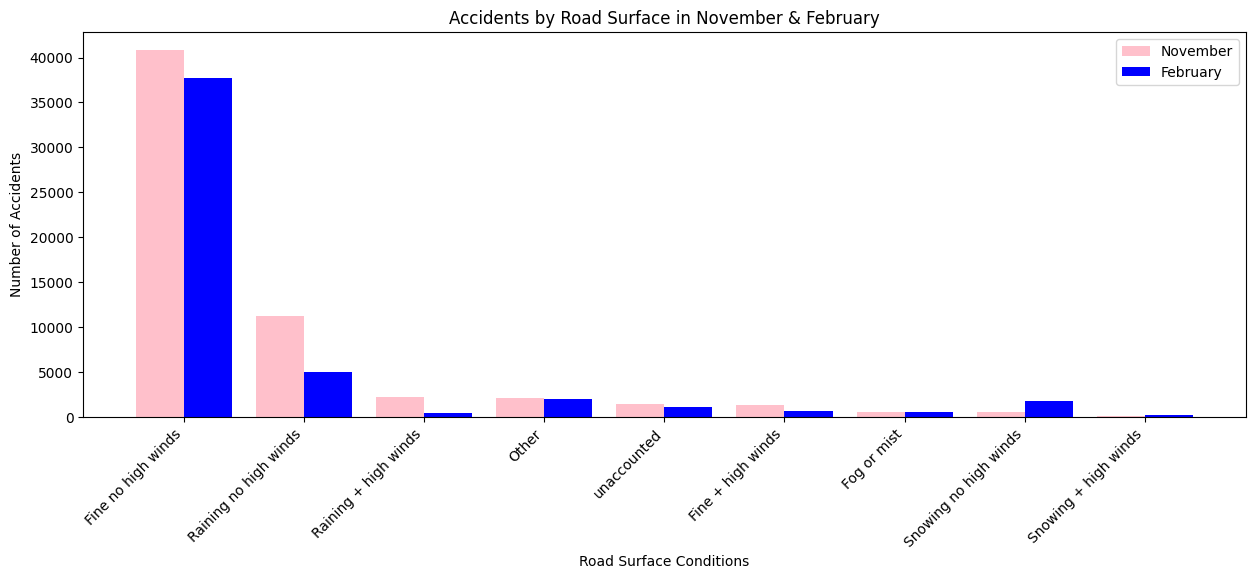

In [47]:
weather_conditions = ['Fine no high winds', 'Raining no high winds', 'Raining + high winds', 'Other', 'unaccounted', 'Fine + high winds', 'Fog or mist', 'Snowing no high winds', 'Snowing + high winds'
]

nov_con = [most_common_weather_nov.get(cond, 0) for cond in weather_conditions]
feb_con = [most_common_weather_feb.get(cond, 0) for cond in weather_conditions]
x = np.arange(len(weather_conditions)) 
plt.bar(x - 0.2, nov_con, width=0.4, label='November', color='pink')
plt.bar(x + 0.2, feb_con, width=0.4, label='February', color='blue')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Road Surface in November & February')
plt.xticks(ticks=x, labels=weather_conditions)
plt.legend()
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.show()


<h4 style="color: blue;">No. 7</h1>

In [48]:
road_type_counts = accident['Road_Type'].value_counts()

In [49]:
road_type_counts

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<h2 style="color: blue;">INSIGHT 7</h1>
<H3>The road type with the highest number of accidents is Single carriageway with 74.4% or 492,143 with cases.</H2>

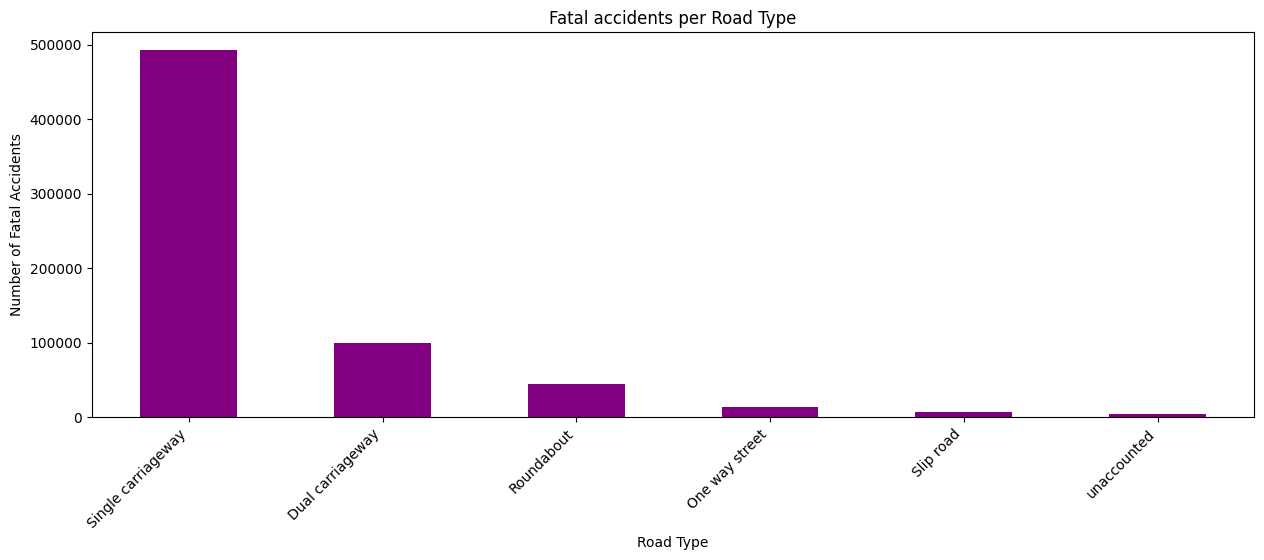

In [50]:
road_type_counts.plot(kind='bar', color = 'purple')

plt.title('Fatal accidents per Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Fatal Accidents')
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.show()

<h4 style="color: blue;">No. 8</h1>

In [51]:
fatal_accidents = accident[accident['Accident_Severity'] == 'Fatal']
most_fatal_district = fatal_accidents['District Area'].value_counts().head(10)

In [52]:
most_fatal_district

District Area
Birmingham                  105
Leeds                        93
Highland                     88
East Riding of Yorkshire     85
Bradford                     71
Aberdeenshire                66
Powys                        59
Wakefield                    56
Doncaster                    56
Herefordshire, County of     51
Name: count, dtype: int64

<h2 style="color: blue;">INSIGHT 8</h1>
<H3>Birmingham has the highest number of fatal accidents</H2>

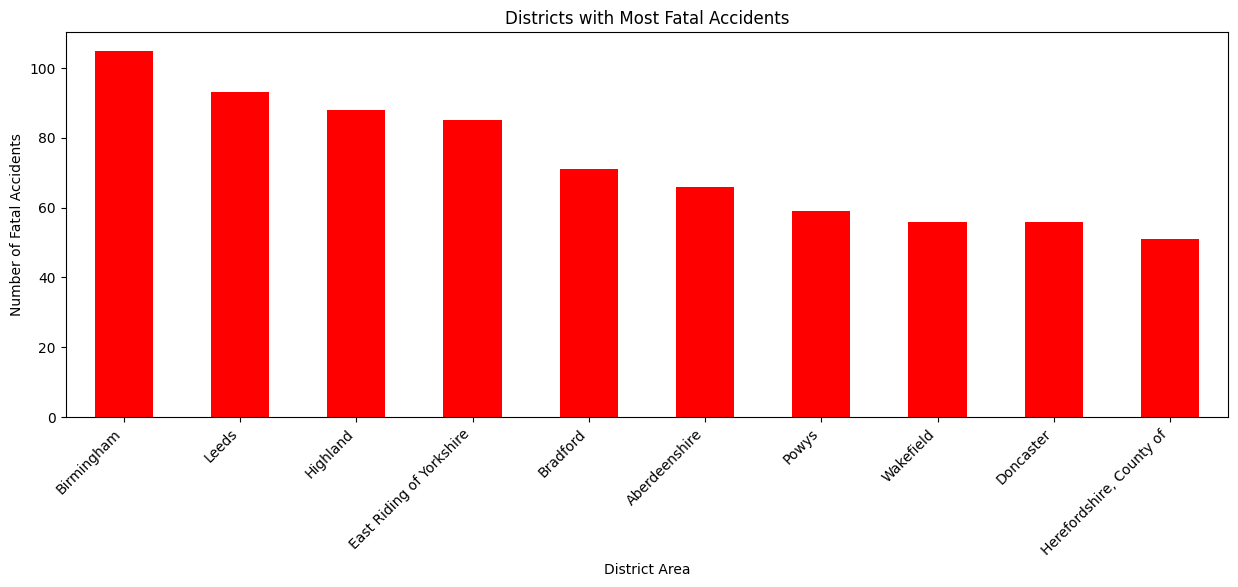

In [53]:
most_fatal_district.plot(kind='bar', color='red')
plt.xlabel('District Area')
plt.ylabel('Number of Fatal Accidents')
plt.title('Districts with Most Fatal Accidents')
plt.xticks(rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.show()

<h4 style="color: blue;">No. 9</h1>

In [54]:
vehicle_counts = accident['Vehicle_Type'].value_counts()

In [55]:
vehicle_counts

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2 style="color: blue;">INSIGHT 9</h1>
<h3>Cars are involved in the highest number of accidents with 75.3% or 497,992 cases, making them the most common vehicle type in accidents.</h2>

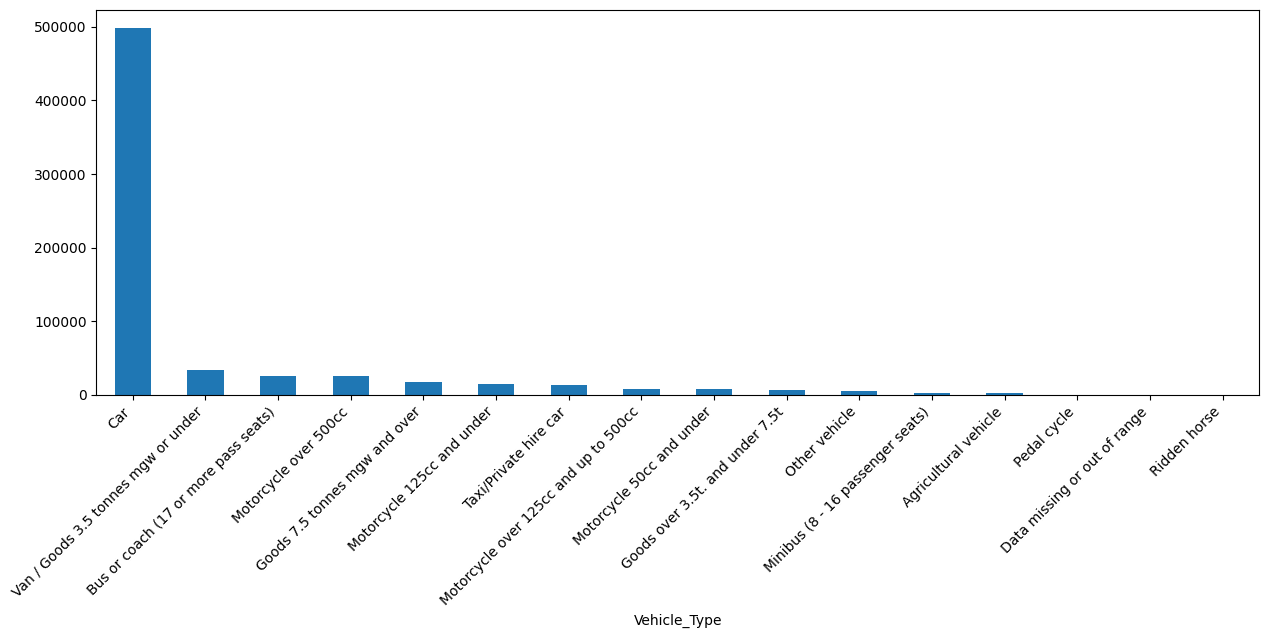

In [56]:
vehicle_counts.plot(kind='bar')
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15, 5)
plt.show()

<h4 style="color: blue;">No. 10</h1>

In [57]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

In [58]:
accident_2022 = accident[accident['Year'] == 2022]

In [59]:
accident_2022 = accident[accident['Year'] == 2022]
accident_2022['Urban_or_Rural_Area'].value_counts().sum()


np.int64(144419)

<h2 style="color: blue;">Insight 10</h1>
<h3>In 2022, about 65.8% of accidents in 2022 occurred in urban areas, while 34.9% in rural areas.</h2>

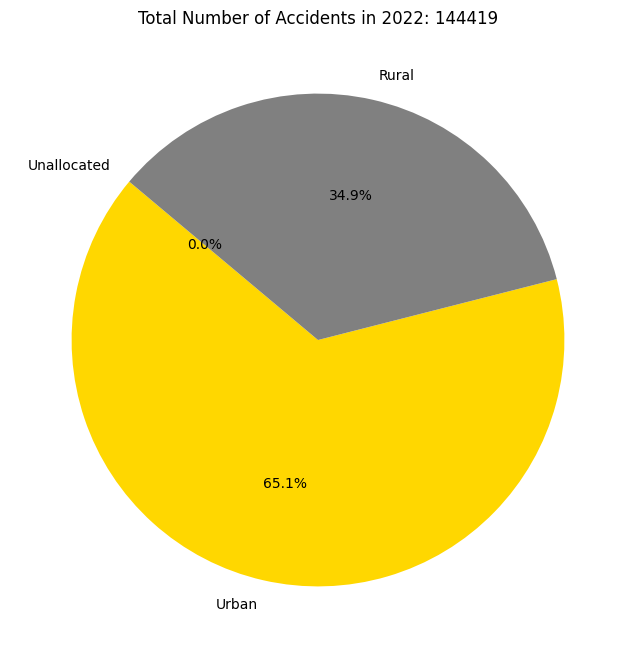

In [60]:


urban_rural_counts = accident_2022['Urban_or_Rural_Area'].value_counts()
plt.gcf().set_size_inches(8,8)
plt.pie(
    urban_rural_counts, 
    labels=urban_rural_counts.index, 
    autopct='%1.1f%%', 
    colors=['gold', 'gray'], 
    startangle=140
)

plt.title(f'Total Number of Accidents in 2022: {urban_rural_counts.sum()}')
plt.show()


<h4 style="color: blue;">No. 11</h1>

In [61]:
accident_2022['Weather_Conditions'].value_counts()
weather_counts = accident_2022['Weather_Conditions'].value_counts()
weather_counts

Weather_Conditions
Fine no high winds       115970
Raining no high winds     15195
Other                      4300
Snowing no high winds      2923
unaccounted                2654
Raining + high winds       1140
Fine + high winds          1051
Fog or mist                 902
Snowing + high winds        284
Name: count, dtype: int64

<h2 style="color: blue;">Insight 11</h1>
<h3>About 80% of accidents in 2022 occured in fine conditions with no hign winds</h2>

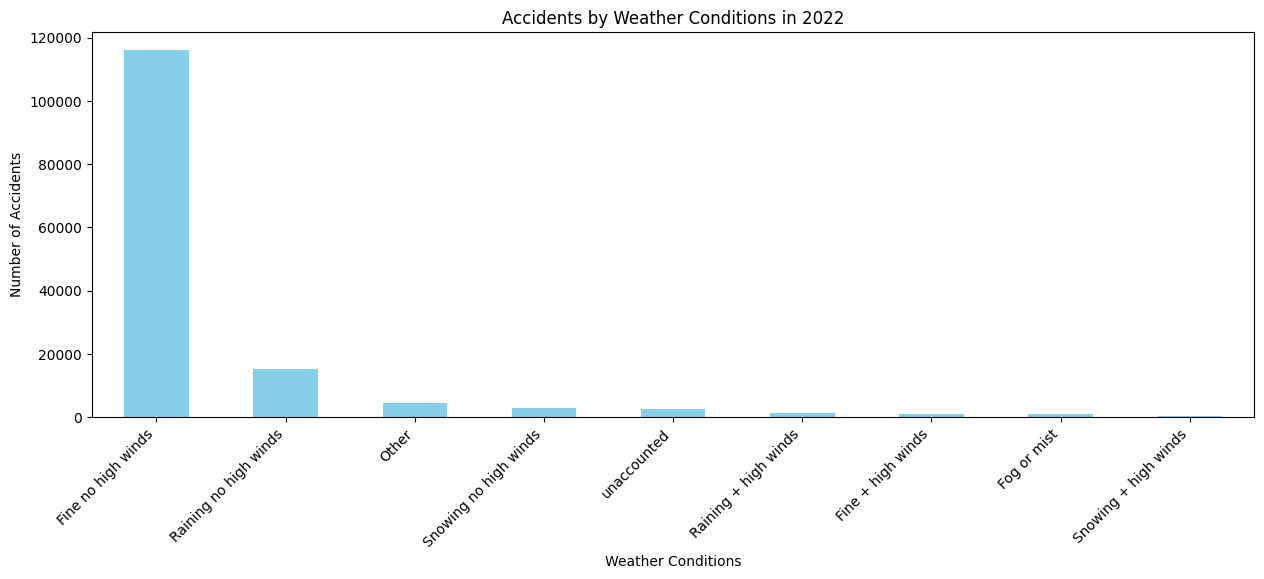

In [62]:
weather_counts.plot(kind='bar',color='skyblue')
plt.gcf().set_size_inches(15,5)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Weather Conditions in 2022')
plt.xticks(rotation=45, ha='right')
plt.show()

<h4 style="color: blue;">No. 12</h1>

In [63]:
road_mon = accident.groupby(['Month', 'Road_Surface_Conditions']).size().unstack()
road_mon

C:\Users\Meloujean\AppData\Local\Temp\ipykernel_57252\2554388421.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_mon = accident.groupby(['Month', 'Road_Surface_Conditions']).size().unstack()


Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,unknown road condition
Month,,,,,,
1,22304,142,4770,1366,24224,66
2,28284,48,3363,1533,16207,56
3,40312,48,654,259,12743,70
4,44413,24,90,109,7061,47
5,46117,55,8,9,10106,57
6,46983,109,3,6,9334,46
7,43753,124,6,8,13495,59
8,41513,80,5,6,12242,67
9,45110,69,8,6,11209,53


<h2 style="color: blue;">INSIGHT 12</h1>
<h3>From November to January, most of accident occured in wet or damp road surfaces. In contrast February to October the majority of accidents occured in dry surfaces</h2>

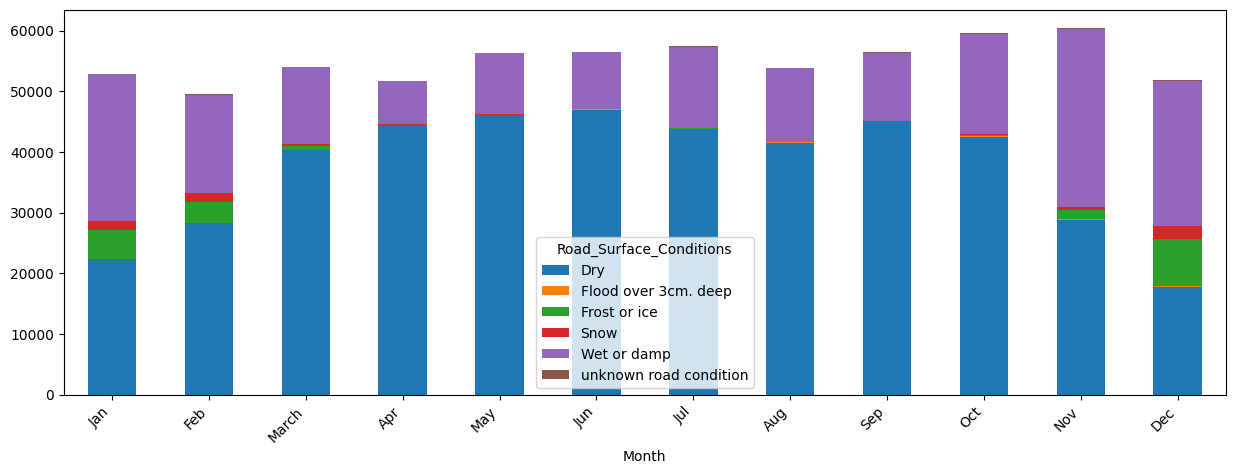

In [64]:
day_names = {
    1: 'Jan', 2: 'Feb', 3: 'March', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

road_mon.index = road_mon.index.map(day_names)
road_mon.plot(kind='bar',stacked = True)
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)



<h4 style="color: blue;">No. 13</h1>

In [79]:
accident_year = accident[accident['Year'] == 2019]
accident_2019 = accident[accident['Year'] == 2019]['District Area'].mode()[0]
accident_2019

'Birmingham'

In [80]:
accident_year = accident[accident['Year'] == 2020]
accident_2020 = accident[accident['Year'] == 2020]['District Area'].mode()[0]
accident_2020

'Birmingham'

In [81]:
accident_year = accident[accident['Year'] == 2021]
accident_2021 = accident[accident['Year'] == 2021]['District Area'].mode()[0]
accident_2021

'Birmingham'

In [82]:
accident_year = accident[accident['Year'] == 2022]
accident_2022 = accident[accident['Year'] == 2022]['District Area'].mode()[0]
accident_2022

'Birmingham'

<h2 style="color: blue;">INSIGHT 13</h1>
<h3>From 2019 to 2022, Birmingham consistently recorded the highest number of accidents each year.</h2>

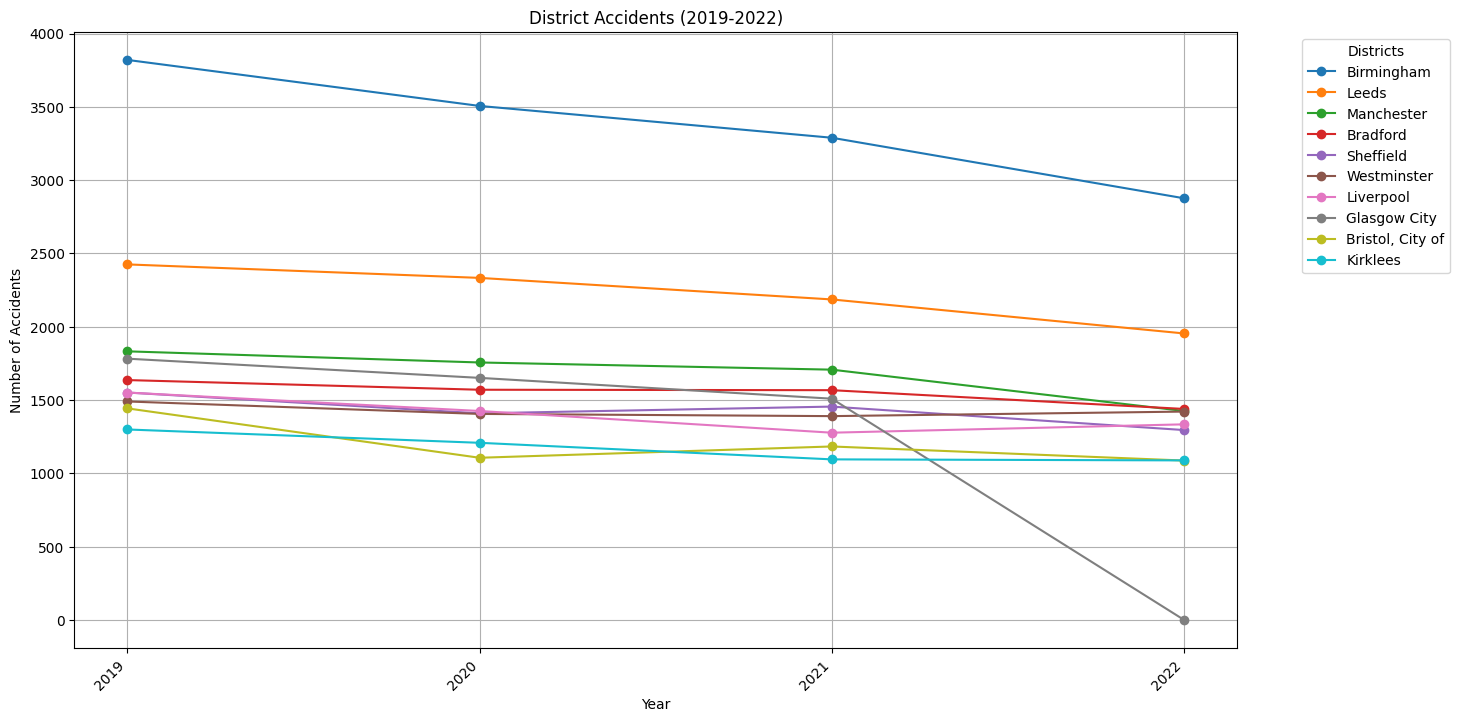

In [89]:
accident_counts = pd.DataFrame({'2019': accident_2019, '2020': accident_2020,'2021': accident_2021,'2022': accident_2022}).fillna(0)
accident_counts['Total'] = accident_counts.sum(axis=1)
top_10_districts = accident_counts['Total'].sort_values(ascending=False).head(10).index
accident_counts_top_10 = accident_counts.loc[top_10_districts]
for district in accident_counts_top_10.index:
    plt.plot(accident_counts_top_10.columns[:-1], accident_counts_top_10.loc[district][:-1], marker='o', label=district) 

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('District Accidents (2019-2022)')
plt.legend(title="Districts", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,8)
plt.show()


<h4 style="color: blue;">No. 14</h1>

In [105]:
birmingham_accidents = accident[accident['District Area'] == 'Birmingham']
severity_birmingham = birmingham_accidents['Accident_Severity'].value_counts()
severity_birmingham

<h2 style="color: blue;">INSIGHT NO. 14</h1>
<H3>Most accidents in Birmingham are classified as slight</H2>

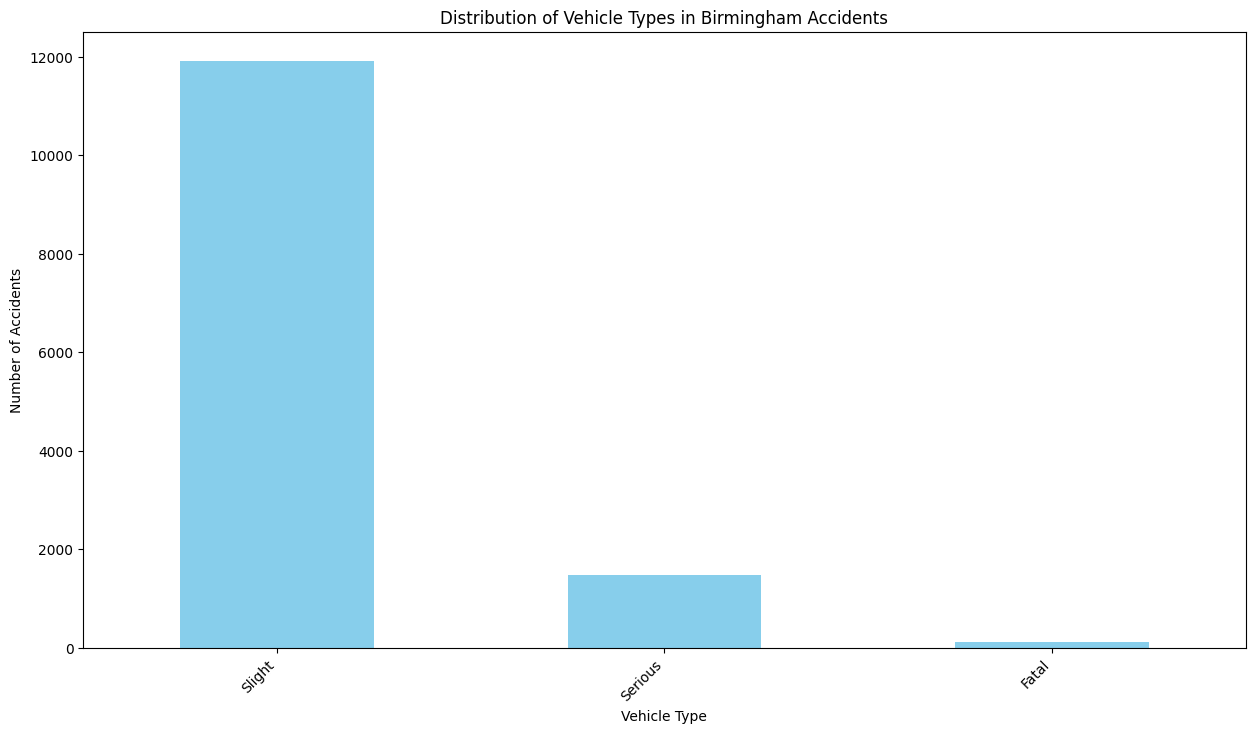

In [110]:
severity_birmingham.plot(kind='bar', color='skyblue')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Vehicle Types in Birmingham Accidents')
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,8)
plt.show()

<H4 style="color: blue;">No. 15</H1>

In [92]:
birmingham_vehicle_type = birmingham_accidents['Vehicle_Type'].value_counts()

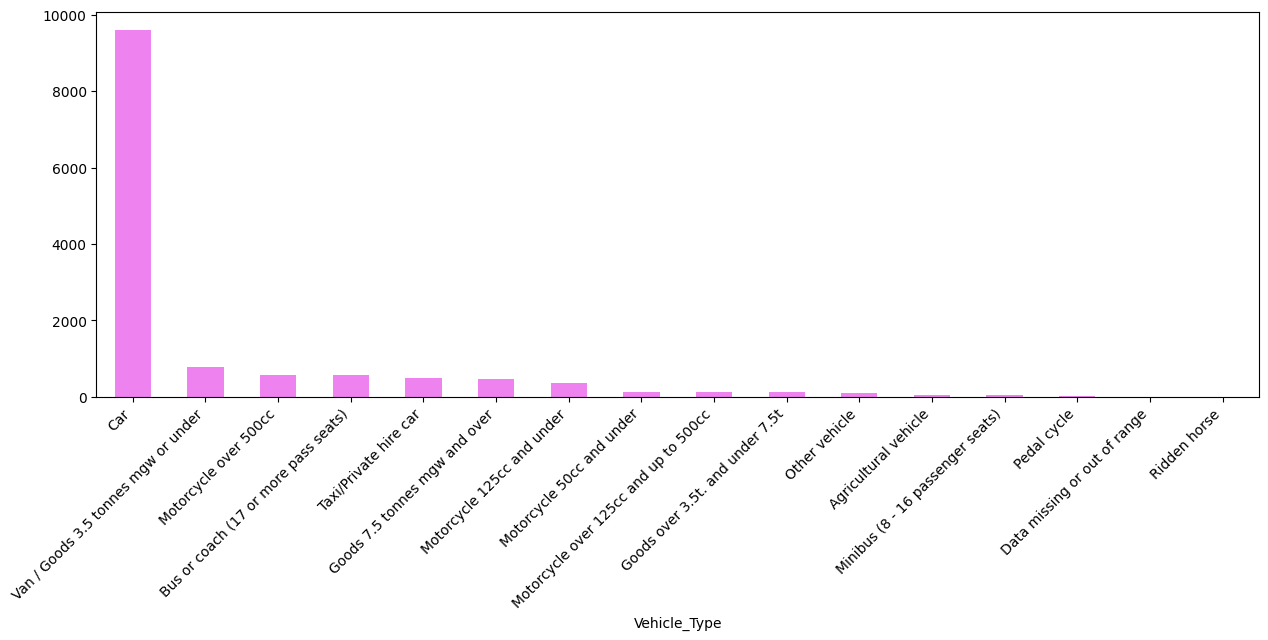

In [96]:
birmingham_vehicle_type.plot(kind='bar',stacked = True, color = 'violet')
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)

<h4 style="color: blue;">No. 16</h1>

In [97]:
light_conditions = accident['Light_Conditions'].value_counts()

In [98]:
light_conditions

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h2 style="color: blue;">Insight 16</h1>
<h3>Most accidents happen under "Daylight" conditions with 73.3% or 484880 case</h2>

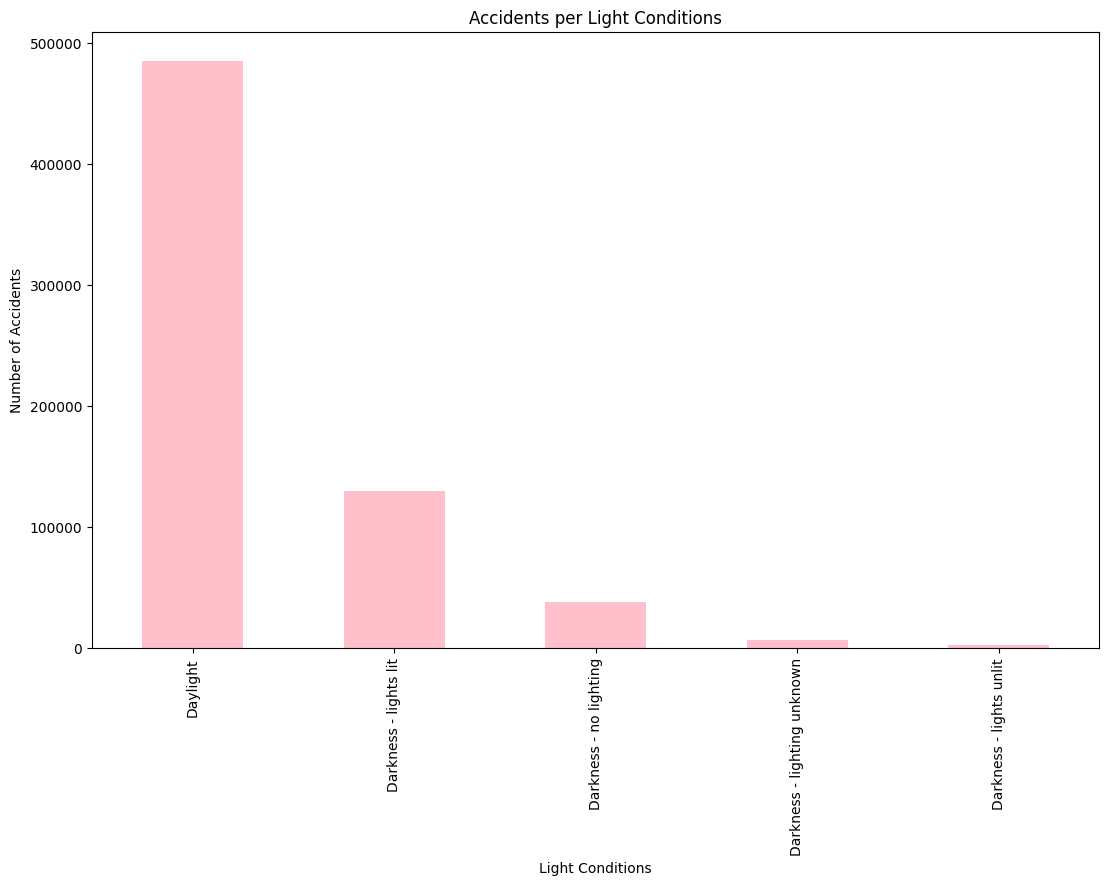

In [116]:
light_conditions.plot(kind='bar', color='pink')
plt.title('Accidents per Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.show()

<h4 style="color: blue;">No. 17, 18, 19, 20</h1>

In [119]:
accident_day = accident.groupby(['DayOfWeek', 'Accident_Severity']).size().unstack()
accident_day

C:\Users\Meloujean\AppData\Local\Temp\ipykernel_57252\90038905.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_day = accident.groupby(['DayOfWeek', 'Accident_Severity']).size().unstack()


Accident_Severity,Fatal,Serious,Slight
DayOfWeek,,,
0,1385,11664,59631
1,1105,11918,81527
2,1113,12488,85957
3,1097,12440,85974
4,1113,12633,84154
5,1326,14000,91852
6,1522,13074,74706


In [120]:
72680, 94550, 99558, 99511, 97900, 107178, 89302

(72680, 94550, 99558, 99511, 97900, 107178, 89302)

<h2 style="color: blue;">INSIGHT 17</h1>
<h3>Saturday (Day 5) has the highest number of accidents, with 13.90% or 91,852 slight and 2.11% or 14,000 serious cases, making it the most accident-prone day of the week.</h2>

C:\Users\Meloujean\AppData\Local\Temp\ipykernel_57252\3835620969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_day = accident.groupby(['DayOfWeek', 'Accident_Severity']).size().unstack()


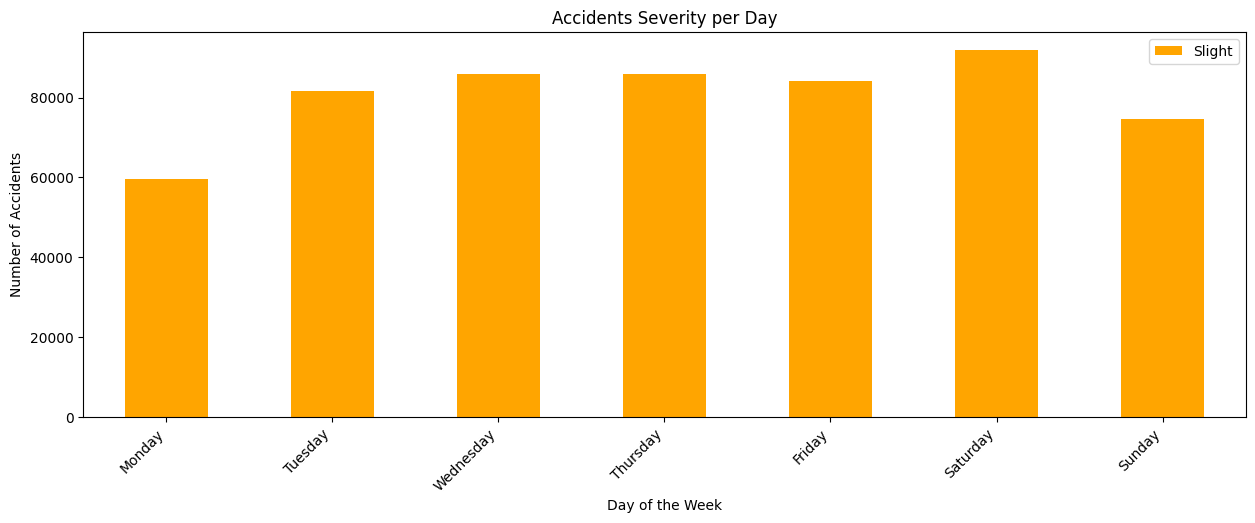

In [140]:
accident_day = accident.groupby(['DayOfWeek', 'Accident_Severity']).size().unstack()

day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

accident_day.index = accident_day.index.map(day_names)
accident_slight = accident_day['Slight']
accident_slight.plot(kind='bar', color='orange')

plt.title('Accidents Severity per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.legend()
plt.show()


<h2 style="color: blue;">INSIGHT 18</h1>
<h3>Sunday (Day 6) records the highest number of fatal accidents (1,522 cases), while Thursdays (Day 3) have the lowest (1,097)</h2> 

C:\Users\Meloujean\AppData\Local\Temp\ipykernel_57252\4181720545.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_day = accident.groupby(['DayOfWeek', 'Accident_Severity']).size().unstack()


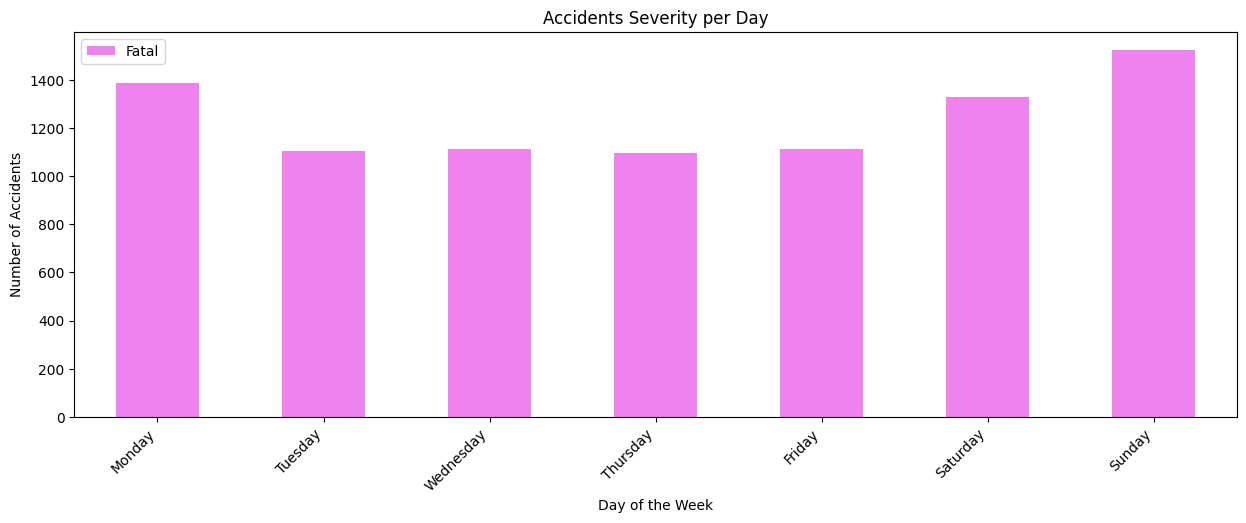

In [144]:
accident_day = accident.groupby(['DayOfWeek', 'Accident_Severity']).size().unstack()

day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

accident_day.index = accident_day.index.map(day_names)
accident_fatal = accident_day['Fatal']
accident_fatal.plot(kind='bar', color='violet')

plt.title('Accidents Severity per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.legend()
plt.show()


<h2 style="color: blue;">INSIGHT 19</h1>
<h3>Monday (Day 0) has the lowest number of total accidents. </h2>

C:\Users\Meloujean\AppData\Local\Temp\ipykernel_57252\3771174761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_day = accident.groupby(['DayOfWeek', 'Accident_Severity']).size().unstack()


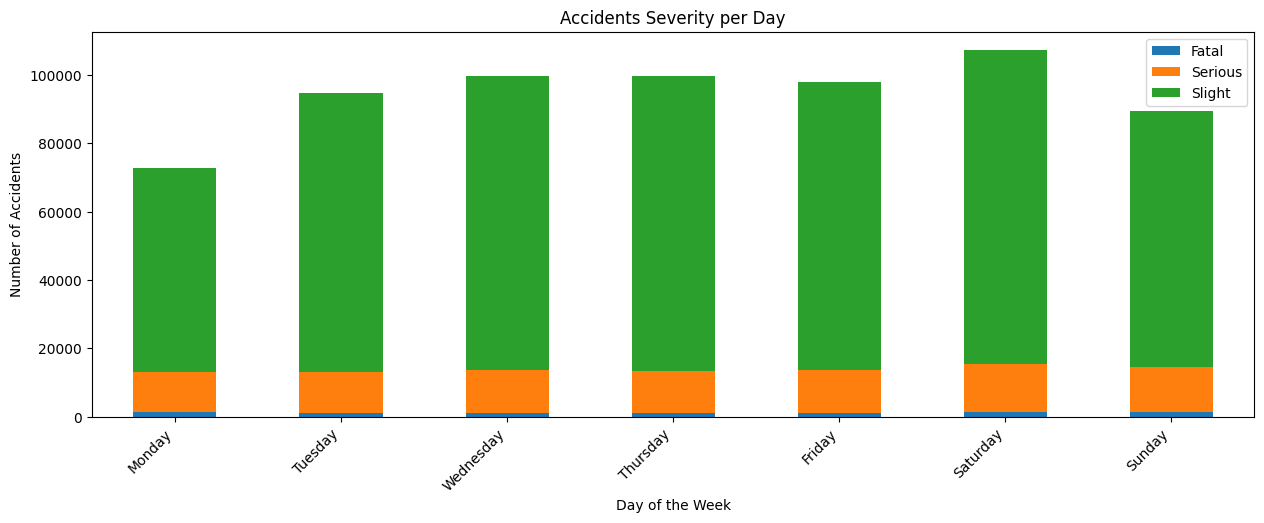

In [146]:
accident_day = accident.groupby(['DayOfWeek', 'Accident_Severity']).size().unstack()

day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}

accident_day.index = accident_day.index.map(day_names)
accident_day.plot(kind='bar', stacked = True)

plt.title('Accidents Severity per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks( rotation=45, ha='right')
plt.gcf().set_size_inches(15,5)
plt.legend()
plt.show()


<h2 style="color: blue;">INSIGHT 20</h1>
<h3>Wednesday 15% or 99,558 cases and Saturday 16.22% or 107,178 together account for a significant portion of weekly accidents.</h2>

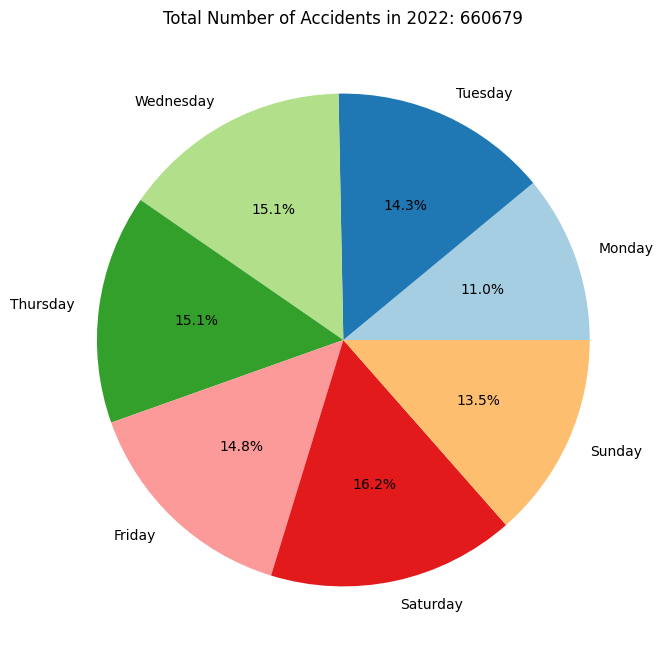

In [150]:

accident_day = accident.groupby('DayOfWeek').size()
day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
accident_day.index = accident_day.index.map(day_names)
plt.figure(figsize=(8, 8))
plt.pie(accident_day, labels=accident_day.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title(f'Total Number of Accidents in 2022: {accident_day.sum()}')
plt.show()
